In [1]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import main

import plotly.express as px

# import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [2]:
### Definining name of analysis ###
name = 'thesis_acceleration_results_MS4525'

# figure_path = "/Users/williamkemp/Dropbox/Apps/Overleaf/Thesis_Draft_01/Figures/thesis_acceleration_results/"
figure_path = '../Figures/'+name+'/'
if not os.path.exists(figure_path):
    os.makedirs(figure_path)


In [3]:
# Importing Drag Build Ups
build_turbulent = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildTurbulent.pkl")
build_laminar = pd.read_pickle("../../DragBuilds/CREATeV_DragBuildLaminar.pkl")

In [4]:
path_1 = '../Results/2023-06-23_CREATeV_Acceleration_Analysis_Cleaned_IMU_NA_MS4525/'
path_2 = '../Results/2023-06-23_CREATeV_Acceleration_Analysis_Cleaned_IMU_Cal_MS4525/'
path_3 = '../Results/2023-06-23_CREATeV_Acceleration_Analysis_Cleaned_IMU_Set_MS4525/'

In [5]:
mass = 12.6 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

In [6]:
# All Cruise Results Manually Segmented

acc_NA_binresult_all = pd.read_pickle(path_1+"acceleration_allresult.pkl")
acc_NA_binresult_good = pd.read_pickle(path_1+"acceleration_goodresult.pkl")

acc_cal_binresult_all = pd.read_pickle(path_2+"acceleration_allresult.pkl")
acc_cal_binresult_good = pd.read_pickle(path_2+"acceleration_goodresult.pkl")

acc_set_binresult_all = pd.read_pickle(path_3+"acceleration_allresult.pkl")
acc_set_binresult_good = pd.read_pickle(path_3+"acceleration_goodresult.pkl")

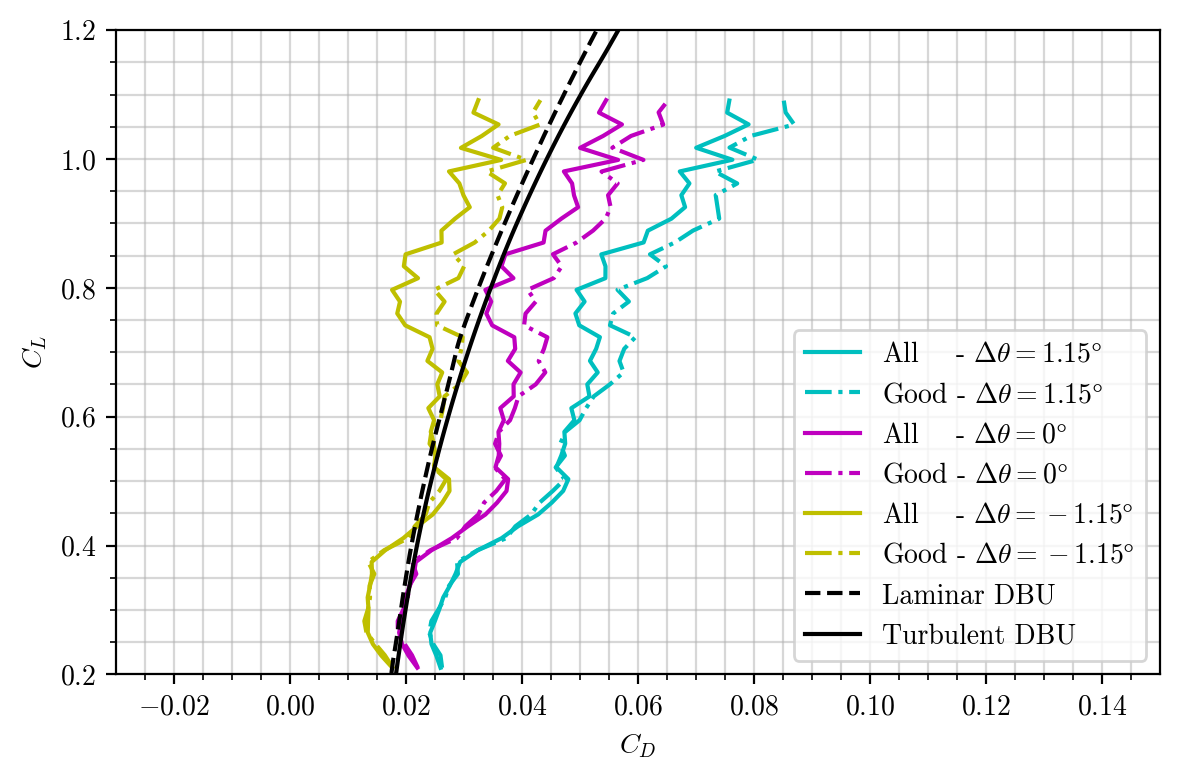

In [7]:
polar_acceleration_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

plt.plot(acc_cal_binresult_all.ave_polar.CD, acc_cal_binresult_all.ave_polar.CL, marker='', markersize=5, color='c', linestyle='-', label="All    - $\Delta \\theta = 1.15 \degree$")
plt.plot(acc_cal_binresult_good.ave_polar.CD, acc_cal_binresult_good.ave_polar.CL, marker='', markersize=5, color='c', linestyle='-.', label="Good - $\Delta \\theta = 1.15\degree$")

plt.plot(acc_NA_binresult_all.ave_polar.CD, acc_NA_binresult_all.ave_polar.CL, marker='', markersize=5, color='m', linestyle='-',    label="All    - $\Delta \\theta = 0\degree$")
plt.plot(acc_NA_binresult_good.ave_polar.CD, acc_NA_binresult_good.ave_polar.CL, marker='', markersize=5, color='m', linestyle='-.', label="Good - $\Delta \\theta = 0\degree$")

plt.plot(acc_set_binresult_all.ave_polar.CD, acc_set_binresult_all.ave_polar.CL, marker='', markersize=5, color='y', linestyle='-', label="All    - $\Delta \\theta =-1.15\degree$")
plt.plot(acc_set_binresult_good.ave_polar.CD, acc_set_binresult_good.ave_polar.CL, marker='', markersize=5, color='y', linestyle='-.', label="Good - $\Delta \\theta =-1.15\degree$")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([-0.03, 0.15])
plt.ylim([0.2, 1.2])
plt.show()

main.save_figure(polar_acceleration_comparison_raw, f'{polar_acceleration_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

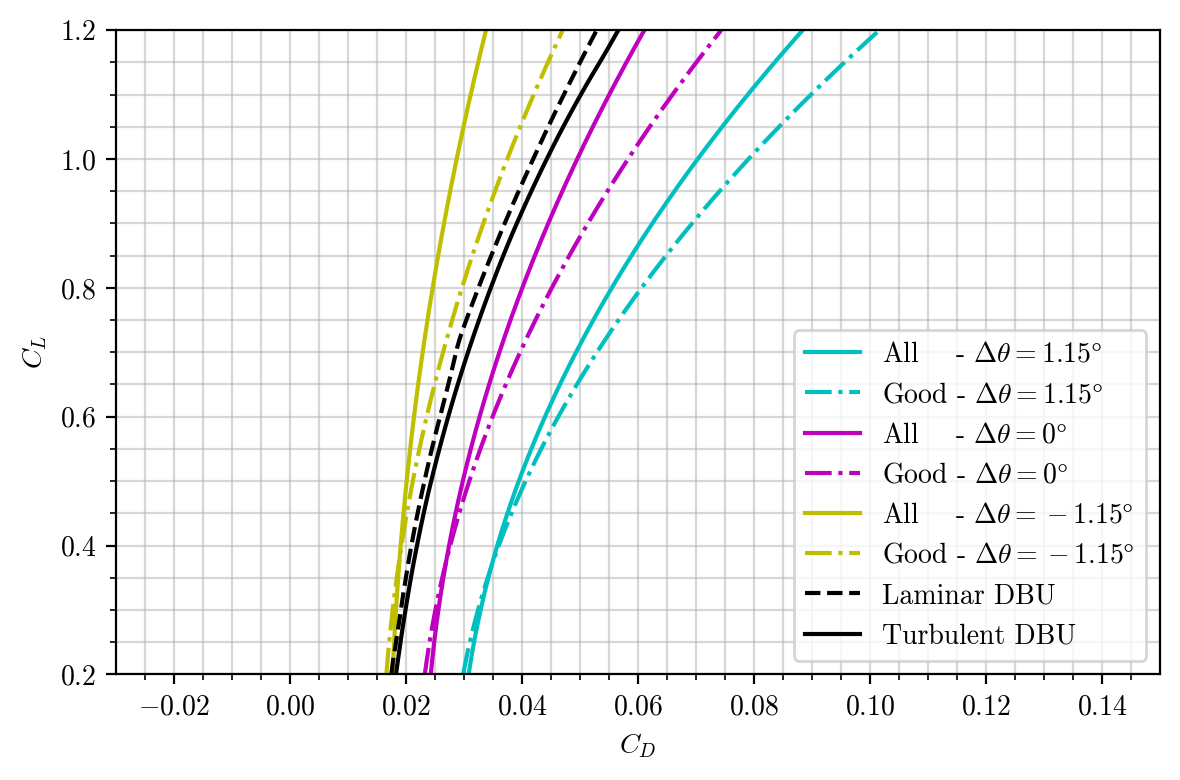

In [8]:
polar_acceleration_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

plt.plot(cl_finders.plotfittedpolar(createv, acc_cal_binresult_all.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, acc_cal_binresult_all.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='-', label="All    - $\Delta \\theta = 1.15 \degree$")
plt.plot(cl_finders.plotfittedpolar(createv, acc_cal_binresult_good.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, acc_cal_binresult_good.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='c', linestyle='-.', label="Good - $\Delta \\theta = 1.15\degree$")

plt.plot(cl_finders.plotfittedpolar(createv, acc_NA_binresult_all.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, acc_NA_binresult_all.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='-',    label="All    - $\Delta \\theta = 0\degree$")
plt.plot(cl_finders.plotfittedpolar(createv, acc_NA_binresult_good.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv, acc_NA_binresult_good.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='m', linestyle='-.', label="Good - $\Delta \\theta = 0\degree$")

cl_finders.plotfittedpolar(createv,acc_set_binresult_all.fit_polar, [0.2, 1.2])[1]
plt.plot(cl_finders.plotfittedpolar(createv,acc_set_binresult_all.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv,acc_set_binresult_all.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='-', label="All    - $\Delta \\theta =-1.15\degree$")
plt.plot(cl_finders.plotfittedpolar(createv,acc_set_binresult_good.fit_polar, [0.2, 1.2])[1], cl_finders.plotfittedpolar(createv,acc_set_binresult_good.fit_polar, [0.2, 1.2])[0], marker='', markersize=5, color='y', linestyle='-.', label="Good - $\Delta \\theta =-1.15\degree$")

plt.plot(build_laminar.CD, build_laminar.CL, linestyle="--", marker="", color="black", label='Laminar DBU')
plt.plot(build_turbulent.CD, build_turbulent.CL, linestyle="solid", marker="", color="black", label='Turbulent DBU')

plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.xlim([-0.03, 0.15])
plt.ylim([0.2, 1.2])
plt.show()
main.save_figure(polar_acceleration_comparison_fit, f'{polar_acceleration_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

In [9]:
print(acc_cal_binresult_all.fit_polar[0])
print(acc_cal_binresult_good.fit_polar[0])

print(acc_NA_binresult_all.fit_polar[0])
print(acc_NA_binresult_good.fit_polar[0])

print(acc_set_binresult_all.fit_polar[0])
print(acc_set_binresult_good.fit_polar[0])

0.029158082696075546
0.0278053846572692
0.023220088449494674
0.021784307077840025
0.017241119103246206
0.015746261354398165


In [10]:
print(acc_cal_binresult_all.fit_polar[1])
print(acc_cal_binresult_good.fit_polar[1])

print(acc_NA_binresult_all.fit_polar[1])
print(acc_NA_binresult_good.fit_polar[1])

print(acc_set_binresult_all.fit_polar[1])
print(acc_set_binresult_good.fit_polar[1])

0.4867146175030641
0.3906261691947857
0.7612843321608903
0.548500817219961
1.741503591426565
0.9219890842910013


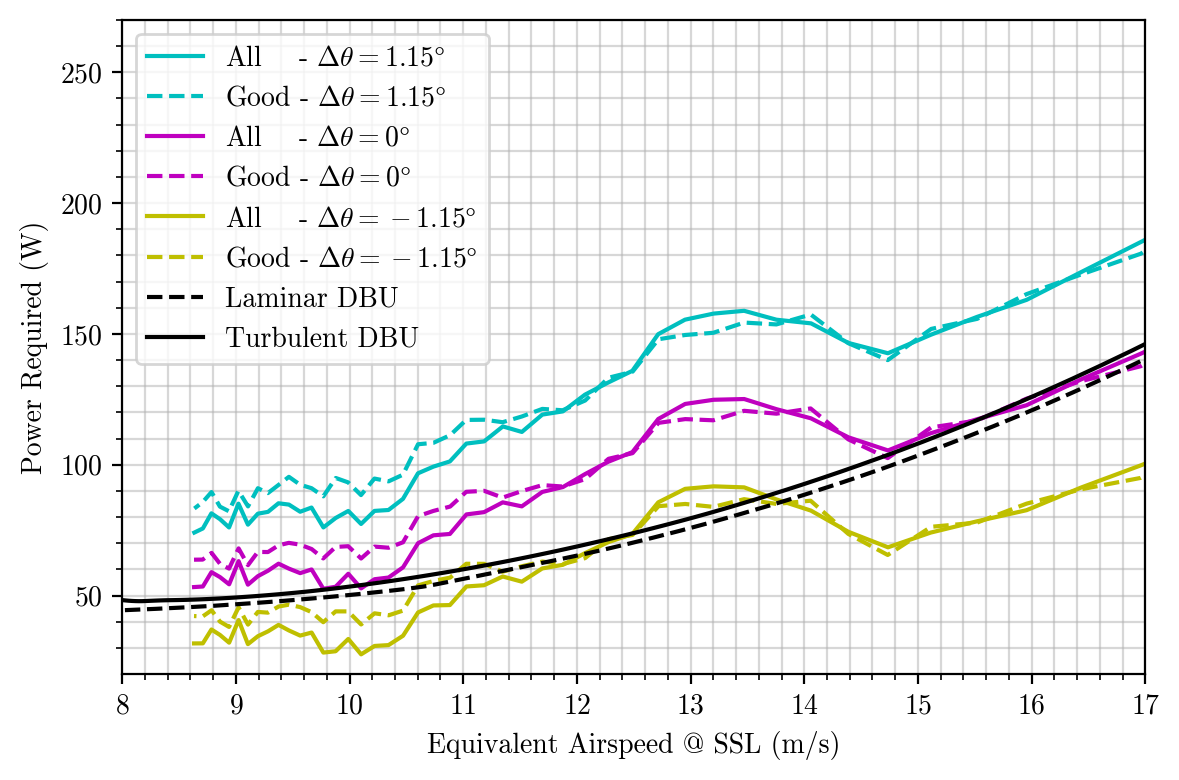

In [11]:
# Getting Power Required from CL, CD
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_acceleration_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_cal_binresult_all.ave_polar.CL , acc_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='-', marker='', color='c', label="All    - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_cal_binresult_good.ave_polar.CL , acc_cal_binresult_good.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='--', marker='', color='c', label="Good - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_NA_binresult_all.ave_polar.CL , acc_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='-', marker='', color='m', label="All    - $\Delta \\theta = 0\degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_NA_binresult_good.ave_polar.CL , acc_NA_binresult_good.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='--', marker='', color='m', label="Good - $\Delta \\theta = 0\degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_set_binresult_all.ave_polar.CL , acc_set_binresult_all.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='-', marker='', color='y', label="All    - $\Delta \\theta = -1.15 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_set_binresult_good.ave_polar.CL , acc_set_binresult_good.ave_polar.CD)
plt.plot(EAS, Preq, linestyle='--', marker='', color='y', label="Good - $\Delta \\theta = -1.15 \degree$")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', marker='', color="black", label="Laminar DBU")
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='-', marker='', color="black", label="Turbulent DBU")

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W)")
plt.xlim(left=8, right=17)
plt.ylim([20, 270])
plt.legend(ncol=1, loc='best', fancybox=True)
plt.show()
main.save_figure(preq_acceleration_comparison_raw, f'{preq_acceleration_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

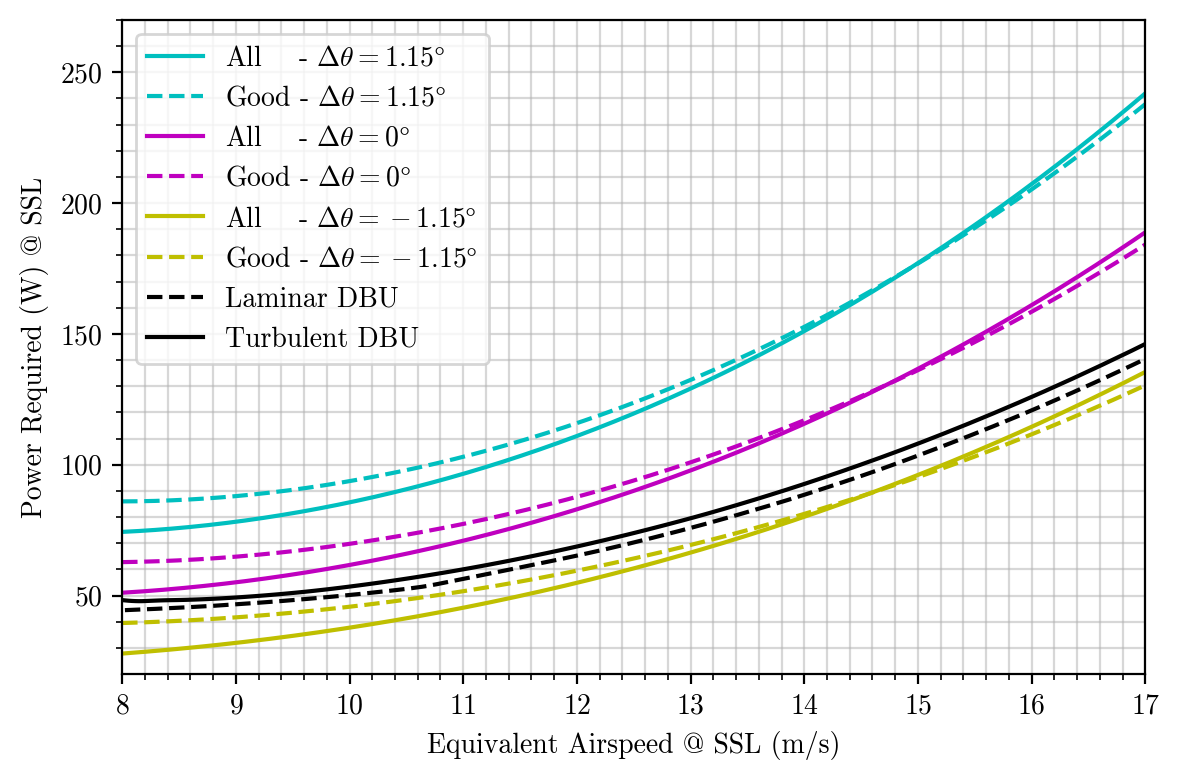

In [12]:
# Getting Power Required from Polars
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
preq_acceleration_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_cal_binresult_all.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='-', label="All    - $\Delta \\theta = 1.15 \degree$")
[Preq, EAS] = cl_finders.polar2preqew(createv, acc_cal_binresult_good.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', markersize=5, color='c', linestyle='--', label="Good - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_NA_binresult_all.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='m', linestyle='-', label="All    - $\Delta \\theta = 0 \degree$")
[Preq, EAS] = cl_finders.polar2preqew(createv, acc_NA_binresult_good.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='m', linestyle='--', label="Good - $\Delta \\theta = 0 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_set_binresult_all.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='-', label="All    - $\Delta \\theta = -1.15 \degree$")
[Preq, EAS] = cl_finders.polar2preqew(createv, acc_set_binresult_good.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, Preq, marker='', color='y', linestyle='--', label="Good - $\Delta \\theta = -1.15 \degree$")

plt.plot(EAS_XFLR5_Laminar, Preq_XFLR5_Laminar, linestyle='--', color='black', marker='', label='Laminar DBU')
plt.plot(EAS_XFLR5_Turbulent, Preq_XFLR5_Turbulent, linestyle='solid', color='black', marker='', label='Turbulent DBU')

plt.xlim(left=8, right=17)
plt.ylim([20, 270])
plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Power Required (W) @ SSL")
plt.legend(ncol=1, loc='upper left', fancybox=True)
plt.show()
main.save_figure(preq_acceleration_comparison_fit, f'{preq_acceleration_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)

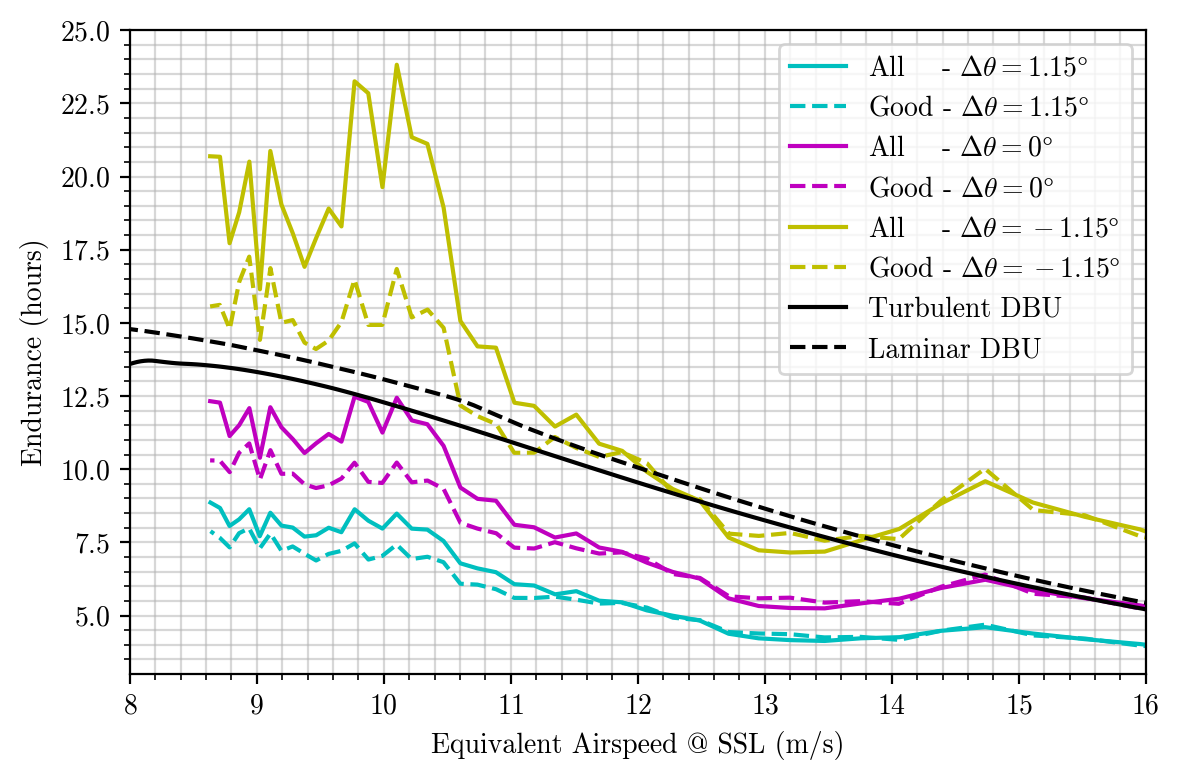

In [13]:
# Calculating Endurance for Raw Cruise

P_total = 1132 # Wh
efficiency= 0.58

# Getting Power Required from CL, CD
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_acceleration_comparison_raw = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_cal_binresult_all.ave_polar.CL , acc_cal_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='c', linestyle='-', label="All    - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_cal_binresult_good.ave_polar.CL , acc_cal_binresult_good.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='c', linestyle='--', label="Good - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_NA_binresult_all.ave_polar.CL , acc_NA_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='m', linestyle='-', label="All    - $\Delta \\theta = 0 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_NA_binresult_good.ave_polar.CL , acc_NA_binresult_good.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='m', linestyle='--', label="Good - $\Delta \\theta = 0 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_set_binresult_all.ave_polar.CL , acc_set_binresult_all.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='-', marker='', color='y', label="All    - $\Delta \\theta = -1.15 \degree$")

[Preq, EAS] = cl_finders.rawpolar2preqew(createv, acc_set_binresult_good.ave_polar.CL , acc_set_binresult_good.ave_polar.CD)
plt.plot(EAS, P_total/(Preq/efficiency), linestyle='--', marker='', color='y', label="Good - $\Delta \\theta = -1.15 \degree$")

plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')
plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=1, loc='upper right', fancybox=True)
plt.xlim([8,16])
plt.ylim([3,25])
plt.show()
main.save_figure(end_acceleration_comparison_raw, f'{end_acceleration_comparison_raw=}'.split('=')[0], figure_path, overwrite=True)

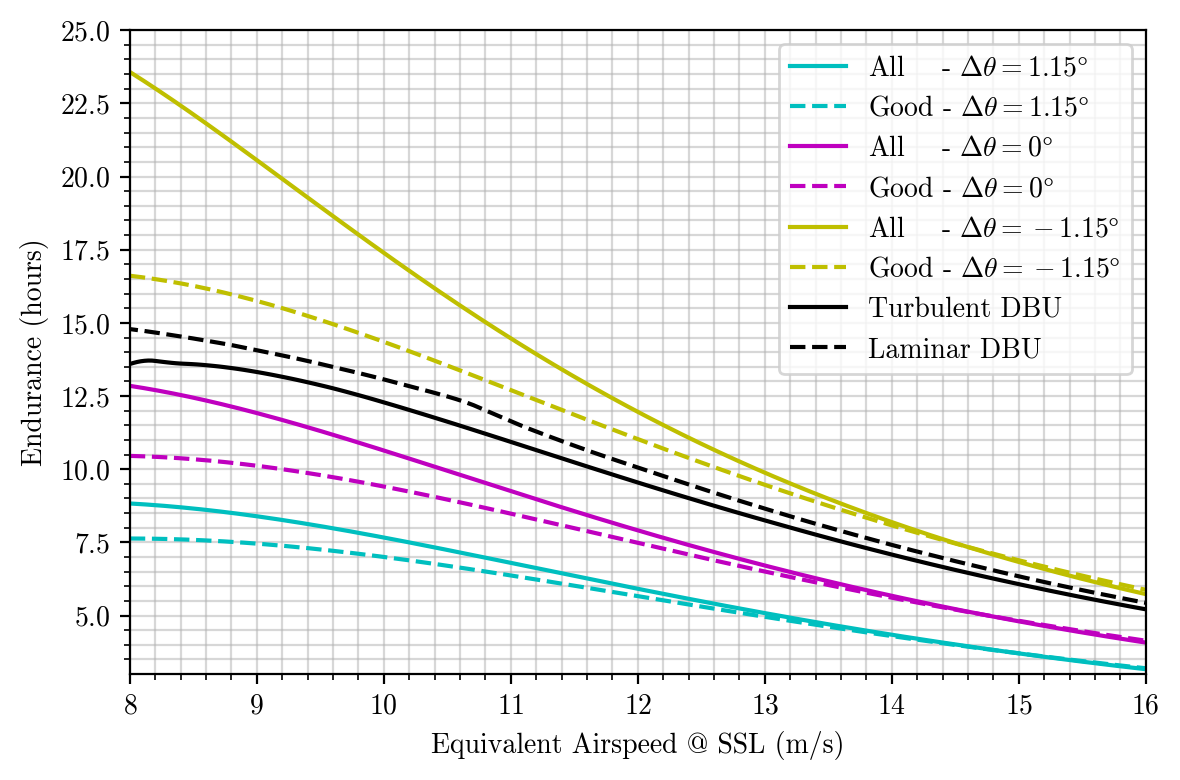

In [14]:
# Getting Power Required from Polars
[Preq_XFLR5_Turbulent, EAS_XFLR5_Turbulent] = cl_finders.rawpolar2preqew(createv, build_turbulent.CL, build_turbulent.CD)
[Preq_XFLR5_Laminar, EAS_XFLR5_Laminar] = cl_finders.rawpolar2preqew(createv, build_laminar.CL, build_laminar.CD)

# Plotting
end_acceleration_comparison_fit = plt.figure(dpi=200, figsize=(6,4))

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_cal_binresult_all.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='c', linestyle='-', label="All    - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_cal_binresult_good.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='c', linestyle='--', label="Good - $\Delta \\theta = 1.15 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_NA_binresult_all.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='m', linestyle='-', label="All    - $\Delta \\theta = 0 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_NA_binresult_good.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', markersize=5, color='m', linestyle='--', label="Good - $\Delta \\theta = 0 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_set_binresult_all.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='-', label="All    - $\Delta \\theta = -1.15 \degree$")

[Preq, EAS] = cl_finders.polar2preqew(createv, acc_set_binresult_good.fit_polar, [8, 17], createvstandardweight=False)
plt.plot(EAS, P_total/(Preq/efficiency), marker='', color='y', linestyle='--', label="Good - $\Delta \\theta = -1.15 \degree$")

plt.plot(EAS_XFLR5_Turbulent, P_total/(Preq_XFLR5_Turbulent/efficiency), linestyle='solid', color='black', marker='', label='Turbulent DBU')
plt.plot(EAS_XFLR5_Laminar, P_total/(Preq_XFLR5_Laminar/efficiency), linestyle='--', color='black', marker='', label='Laminar DBU')

plt.xlabel("Equivalent Airspeed @ SSL (m/s)")
plt.ylabel("Endurance (hours)")
plt.legend(ncol=1, loc='best', fancybox=True)
plt.xlim([8,16])
plt.ylim([3,25])
plt.show()
main.save_figure(end_acceleration_comparison_fit, f'{end_acceleration_comparison_fit=}'.split('=')[0], figure_path, overwrite=True)